In [12]:
import piplite
await piplite.install(['numpy'])
await piplite.install(['pandas'])
await piplite.install(['seaborn'])

In [31]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import statsmodels.api as sm
import scipy.stats

In [9]:
from js import fetch
import io

boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(boston_url)
boston_url_new = io.BytesIO((await resp.arrayBuffer()).to_py())

In [10]:
boston_df=pd.read_csv(boston_url_new)

In [11]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


# Task 4: Generate Descriptive Statistics and Visualizations

#### For the "Median value of owner-occupied homes" provide a boxplot

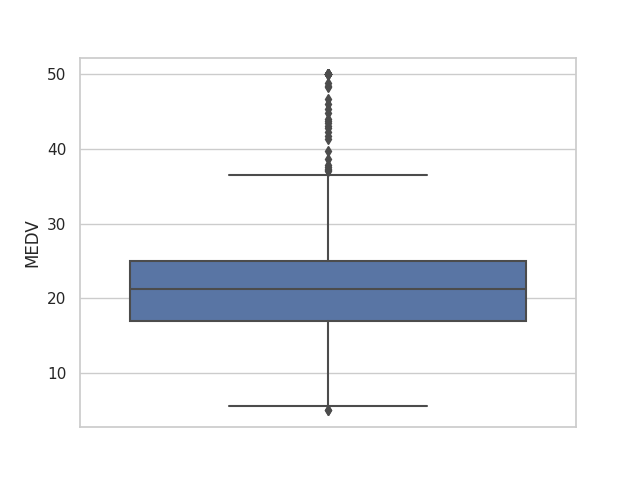

In [24]:
ax = sns.boxplot(y='MEDV', data=boston_df)
plt.show()

#### Provide a  bar plot for the Charles river variable

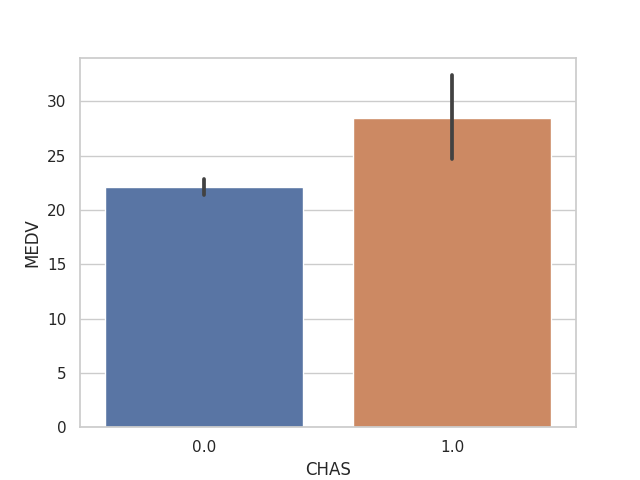

In [22]:
sns.set(style="whitegrid")
ax = sns.barplot(x="CHAS", y="MEDV", data=boston_df)
plt.show()

#### Provide a boxplot for the MEDV variable vs the AGE variable. 
(Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

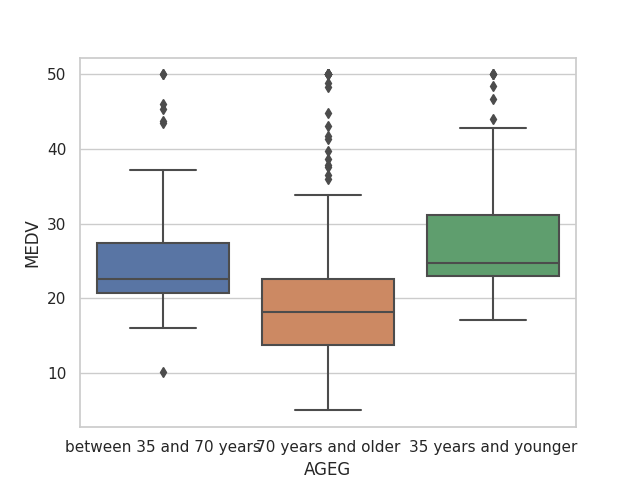

In [25]:
boston_df.loc[(boston_df['AGE'] <= 35), 'AGEG'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35)&(boston_df['AGE'] < 70), 'AGEG'] = 'between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'AGEG'] = '70 years and older'

ax = sns.boxplot(x='AGEG', y='MEDV', data=boston_df)
plt.show()

#### Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. 
What can you say about the relationship?

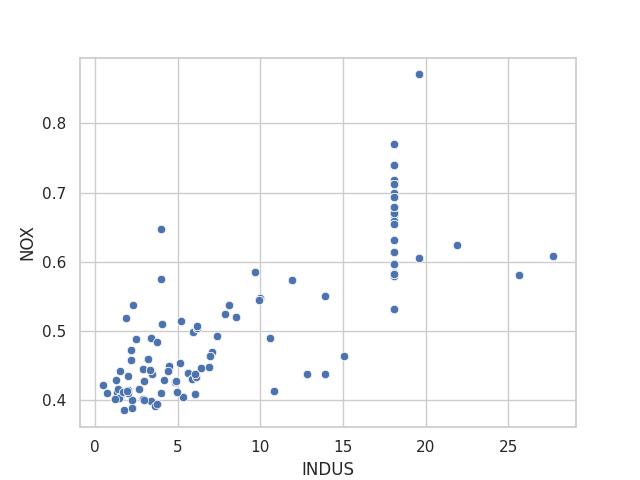

In [27]:
ax = sns.scatterplot(y='NOX', x='INDUS', data=boston_df)
plt.show()

From the scatter plot above, we see that when proportion of non-retail business acres per town get higher, its make nitric oxide concentrations higher too.

#### Create a histogram for the pupil to teacher ratio variable

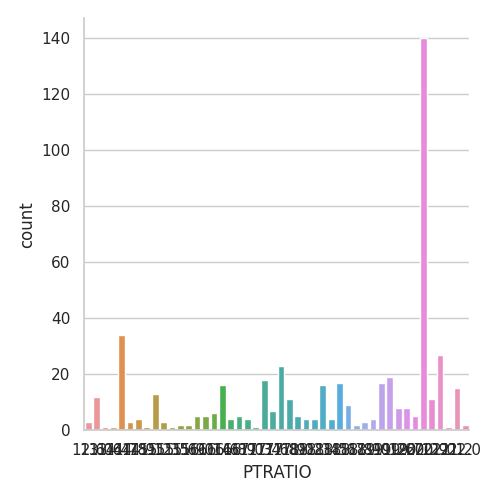

In [28]:
sns.catplot(x='PTRATIO', kind='count', data=boston_df)
plt.show()

# Task 5: Use the appropriate tests to answer the questions provided.

#### Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

State the hypothesis:

*   $H\_0:$ there is no difference in median value of houses bounded by the Charles river
*   $H\_1:$ there is a difference in median value of houses bounded by the Charles river

We will use α = 0.05

In [46]:
#Test for equality of variance
scipy.stats.levene(boston_df[boston_df['CHAS'] == 0.0]['MEDV'],
                    boston_df[boston_df['CHAS'] == 1.0]['MEDV'], center='mean')

LeveneResult(statistic=8.75190489604598, pvalue=0.0032381193676398285)

since the p-value is less than 0.05, the variance are not equal

In [43]:
scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 0.0]['MEDV'],
                      boston_df[boston_df['CHAS'] == 1.0]['MEDV'], equal_var = True)

Ttest_indResult(statistic=-3.996437466090509, pvalue=7.390623170519905e-05)

**Conclusion:** Since the p-value is more than 0.05, we fail to reject the null hypothesis as there is no evidence that the means differ.

#### Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

State the hypothesis

*   $H\_0: µ\_1 = µ\_2 = µ\_3$ (the three population means are equal)
*   $H\_1:$ At least one of the means differ

We will use α = 0.05

In [45]:
#Test for equality of variance
scipy.stats.levene(boston_df[boston_df['AGEG'] == '35 years and younger']['MEDV'],
                   boston_df[boston_df['AGEG'] == 'between 35 and 70 years']['MEDV'], 
                   boston_df[boston_df['AGEG'] == '70 years and older']['MEDV'], 
                   center='mean')

LeveneResult(statistic=2.7806200293748304, pvalue=0.06295337343259205)

since the p-value is MORE than 0.05, the variance are equal

In [48]:
# separate the three samples (one for each job category) into a variable each.
thirtyfive_lower = boston_df[boston_df['AGEG'] == '35 years and younger']['MEDV']
thirtyfive_seventy = boston_df[boston_df['AGEG'] == 'between 35 and 70 years']['MEDV']
seventy_older = boston_df[boston_df['AGEG'] == '70 years and older']['MEDV']

In [50]:
# run a one-way ANOVA
f_statistic, p_value = scipy.stats.f_oneway(thirtyfive_lower, thirtyfive_seventy, seventy_older)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


**Conclusion:** Since the p-value is more than 0.05, we fail to reject the null hypothesis as there is no evidence that the means differ.

#### Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

State the hypothesis:

*   $H\_0:$ Nitric oxide concentrations is not correlated with proportion of non-retail business acres per town
*   $H\_1:$ Nitric oxide concentrations is correlated with proportion of non-retail business acres per town


In [54]:
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

(0.7636514469209189, 7.913361061211254e-98)

**Conclusion:** Since the p-value is more than 0.05, we fail to reject the null hypothesis as there is a relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.

#### What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

State the hypothesis:

*   $H\_0: β1$ = 0 : weighted distances to five Boston employment centres has no impact on the median value of owner-occupied homes
*   $H\_1: β1$ is not equal to 0 : weighted distances to five Boston employment centres has impact on the median value of owner-occupied homes


In [55]:
## X is the input variables (or independent variables)
X = boston_df['DIS']
## y is the target/dependent variable
y = boston_df['MEDV']
## add an intercept (beta_0) to our model
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Sat, 17 Jun 2023   Prob (F-statistic):           1.21e-08
Time:                        16:21:05   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Conclusion:** Since the the p-value is less than the alpha (α) level = 0.05, so we reject the null hypothesis as there is evidence that weighted distances to five Boston employment centres has impact on the median value of owner-occupied homes.